In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Obtenir la structure de bandes de phonons
with MPRester("HyfUIH7nOGea4sWi3HeF3B4Yjjv5SgwQ") as m:
    bandpho = m.get_phonon_bandstructure_by_material_id("mp-961675")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Plot de la dispersion des phonons et zone de Brillouin

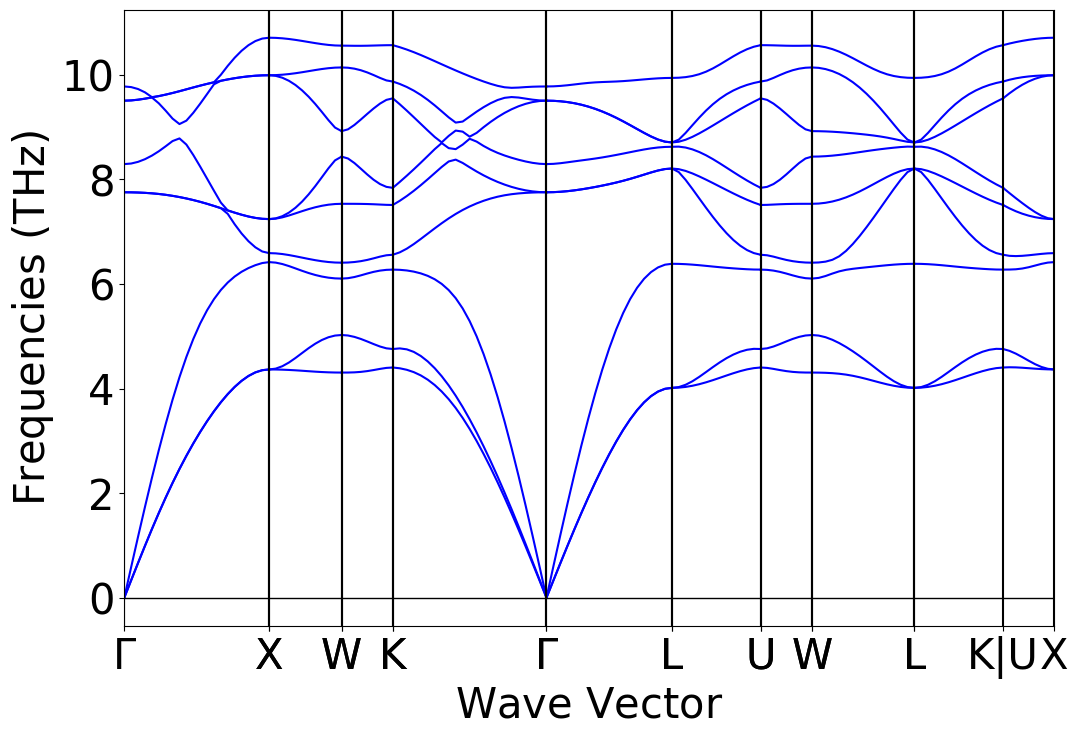

In [3]:
phonon = PhononBSPlotter(bandpho)

#Plot de la dispersion
phonon.bs_plot_data()
phonon.show()

On peut approximer la vitesse du son grace a la relation de dispersion du cristal.

Si la courbe de dispersion est suffisament linéaire, on peut approximer la vitesse du son comme la pente de cette courbe, mais uniquement si les valeurs de $\lambda$ est plus petite que la distance moyenne interatomique.

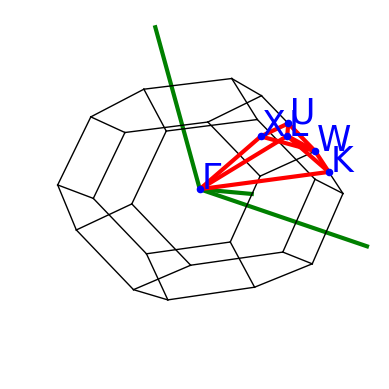

In [4]:
#Zone de Brillouin
phonon.plot_brillouin()

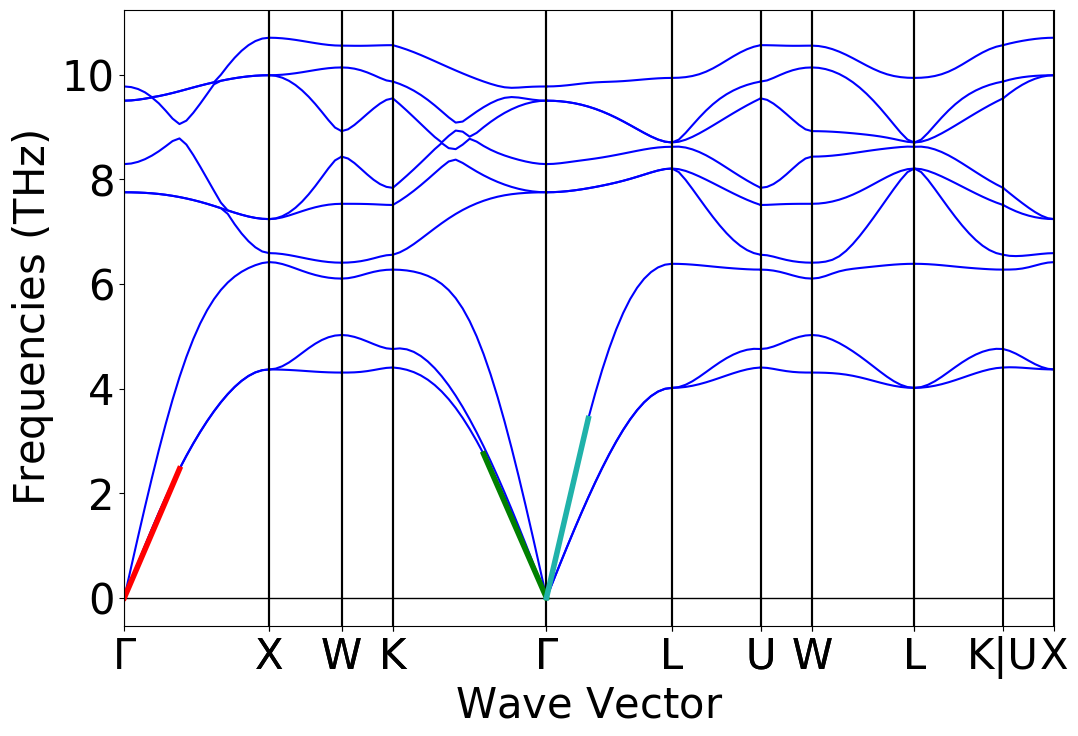

In [18]:
#Choix des directions

phonon.get_plot()
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='red', lw = 4)
plt.plot([distances[3][13],distances[3][13]+distances[3][-1]-distances[3][13]],[frequency[3][0][13],frequency[3][0][13]+frequency[3][0][-1]-frequency[3][0][13]], color='green', lw = 4)
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='lightseagreen', lw = 4)

Direction 1: Γ-X (rouge)

Direction 2: K-Γ (vert)

Direction 3: Γ-L (bleu)

# Calcul de la vitesse du son

On utilise l'approximation de Debye : $\omega = v_s  \mathbf{q} $. Avec $ \mathbf{q}$ la norme ($Å = 10^{-10} m $) et $\omega$ la fréquence (THz = $10^{12}$ Hz).

On aura donc une multiplication par $10^{2}$ car on divise la fréquence par la norme.

Pour le calcul de $v_s$, il faudra donc prendre la pente des différentes branches choisies au dessus

In [19]:
data =phonon.bs_plot_data()
distances = data.get("distances")
frequency = data.get("frequency")
facteur = 100

pente1 = np.abs((frequency[0][1][1] - frequency[0][1][0]) / (distances[0][1]-distances[0][0]))#direction gamma-x
pente2 = np.abs((frequency[3][0][-1] - frequency[3][0][-2]) / (distances[3][-1]-distances[3][-2]))#direction K-gamma
pente3 = np.abs((frequency[4][2][1] - frequency[4][2][0]) / (distances[4][1]-distances[4][0]))#direction gamma-L

print("Vitesse du son dans la direction Γ-X : " + str(slope1*facteur) + " m/s")
print("\n")
print("Vitesse du son dans la direction K-Γ : " + str(slope2*facteur) + " m/s")
print("\n")
print("Vitesse du son dans la direction Γ-L : " + str(slope3*facteur) + " m/s")

Vitesse du son dans la direction Γ-X : 627.3389160279364 m/s


Vitesse du son dans la direction K-Γ : 612.0329149253317 m/s


Vitesse du son dans la direction Γ-L : 1124.092358379543 m/s
